In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf



In [2]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
#가위 이미지 사이즈 조정
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어냄
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

744  images to be resized.
744  images resized.
가위 이미지 resize 완료!


In [4]:
#바위 이미지 사이즈 조정
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어냄
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

756  images to be resized.
756  images resized.
바위 이미지 resize 완료!


In [5]:
#보 이미지 사이즈 조정
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어냄
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

752  images to be resized.
752  images resized.
보 이미지 resize 완료!


In [6]:
#학습 데이터에 이미지 저장

import numpy as np

def load_data(img_path, number_of_data=2252):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 2252 입니다.
x_train shape: (2252, 28, 28, 3)
y_train shape: (2252,)


Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

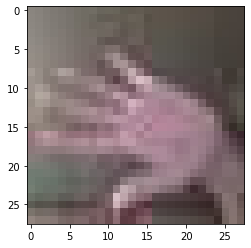

1701 번째 이미지는 바로  2 입니다.


In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) #28,28은 이미지 사이즈 3은 컬러일때 사용<흑백은1>
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

#범위<2252>내 숫자를 넣어서 그 숫자에 해당하는 이미지를 프린트
index=1700     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는 바로 ',  y_train[index], '입니다.')

In [8]:
#가위바위보 이미지 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#10번의 학습을 거쳐 정확도 향상
model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
71/71 [==============================] - 3s 4ms/step - loss: 1.2212 - accuracy: 0.3632
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 1.0199 - accuracy: 0.4698
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.7597 - accuracy: 0.6892
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.5171 - accuracy: 0.8210
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.8455
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8952
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9281
Epoch 8/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1880 - accuracy: 0.9361
Epoch 9/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 0.9569
Epoch 10/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9698


In [9]:
#테스트 데이터에 가위바위보 이미지 저장
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어냄
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_test"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 바위 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어냄
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_test"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 보 테스트 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어냄
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_test"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

279  images to be resized.
279  images resized.
가위 이미지 resize 완료!
282  images to be resized.
282  images resized.
바위 이미지 resize 완료!
376  images to be resized.
376  images resized.
보 이미지 resize 완료!


In [10]:
#테스트 셋 만들기

def load_data2(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=937   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 937 입니다.
x_test shape: (937, 28, 28, 3)
y_test shape: (937,)


In [11]:
#이미지 테스트 결과 
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))
#총 2252개의 이미지 훈련을 통과한 후 937개 이미지를 테스트하여 대략 80퍼센트 이상의 결과값을 도출 할 수 있었습니다.

30/30 - 0s - loss: 30.5531 - accuracy: 0.8933
test_loss: 30.5530948638916 
test_accuracy: 0.8932763934135437
